In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import datetime
import time
import math
import warnings
warnings.filterwarnings("ignore")
import glob

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/My Drive/Colab Notebooks/Dissertation

/content/drive/My Drive/Colab Notebooks/Dissertation


In [4]:
def get_house_path(house):
    return f'data/ukdale-parsed-chunks/house_{house}/'
    
def get_chunk_path(house, chunk):
    return get_house_path(house) + f'chunk_{chunk}.dat'

def get_num_chunks(house):
    return len(glob.glob(get_house_path(house) + 'chunk_*[0-9].dat'))

def read_file(house, chunk, labels):
    file = get_chunk_path(house, chunk)
    print(f'reading file {file}; for house {house} and chunk {chunk}');
    
    dtypes = {}
    for label in labels[house]:
        dtypes[label] = 'float64'
    df = pd.read_table(file, sep = '\t', header=0, names = labels[house], 
                                       dtype = dtypes) 

    return df

In [5]:
def parse_data(df):
    df['timestamp'] = df['unix_time'].astype("datetime64[s]")
    df = df.set_index(df['timestamp'].values)
    df.drop(['unix_time'], axis=1, inplace=True)

    df['timeslice'] = df.timestamp.dt.hour

    return df

In [6]:
def read_labels():
    labels = {}
    for house in range(1, 2):
        fileName = get_chunk_path(house, 1)
        house_labels = pd.read_csv(fileName, sep = '\t', nrows=1).columns.tolist()
        labels[house] = house_labels
    return labels

In [7]:
def get_house_data_generator(house):
    labels = read_labels()
    num_chunks = get_num_chunks(house)
    for i in range(1, num_chunks + 1):
        if int(i) == 1:
            print(f'reading house {house}; chunk 1');

        df = read_file(house, i, labels)
        df = parse_data(df)
        
        print(f'read house {house}; chunk {i}; df.shape is {df.shape}')
    
        yield df

In [8]:
def get_merged_chunks(house, num_chunks):
    max_num_chunks = get_num_chunks(house)
    num_chunks = max_num_chunks if num_chunks > max_num_chunks else num_chunks
    house_gen = get_house_data_generator(house)
    data = [next(house_gen) for i in range(num_chunks)]

    return pd.concat(data)


In [9]:
def get_all_data_generators():
    gen = {}
    for house in range(1,2):
        gen[house] = get_house_data_generator(house)
        
    return gen

In [10]:
labels = read_labels()
for house in range(1,2):
    print('House {}: '.format(house), labels[house], '\n')

House 1:  ['aggregate_1', 'boiler_2', 'solar_thermal_pump_3', 'washing_machine_5', 'dishwasher_6', 'tv_7', 'kitchen_lights_8', 'htpc_9', 'kettle_10', 'toaster_11', 'fridge_12', 'microwave_13', 'amp_livingroom_17', 'adsl_router_18', 'livingroom_s_lamp_19', 'lighting_circuit_25', 'subwoofer_livingroom_28', 'livingroom_lamp_tv_29', 'kitchen_phone&stereo_32', 'coffee_machine_36', 'gas_oven_42', 'data_logger_pc_43', 'office_lamp2_49', 'unix_time'] 



In [11]:
# gen = get_all_data_generators()

In [12]:
# house_gen = get_house_data_generator(1)

In [13]:
def print_heads_tails(df, h=True,t=True):
    print(f'House {house}, data has shape: {df.shape}')
    if h:
        display(df.head(2))

    print()

    if t:
        display(df.tail(2))

In [14]:
ref_chunk_df = get_merged_chunks(1, 8)
print_heads_tails(ref_chunk_df)

reading house 1; chunk 1
reading file data/ukdale-parsed-chunks/house_1/chunk_1.dat; for house 1 and chunk 1
read house 1; chunk 1; df.shape is (2000000, 25)
reading file data/ukdale-parsed-chunks/house_1/chunk_2.dat; for house 1 and chunk 2
read house 1; chunk 2; df.shape is (2000000, 25)
reading file data/ukdale-parsed-chunks/house_1/chunk_3.dat; for house 1 and chunk 3
read house 1; chunk 3; df.shape is (2000000, 25)
reading file data/ukdale-parsed-chunks/house_1/chunk_4.dat; for house 1 and chunk 4
read house 1; chunk 4; df.shape is (2000000, 25)
reading file data/ukdale-parsed-chunks/house_1/chunk_5.dat; for house 1 and chunk 5
read house 1; chunk 5; df.shape is (2000000, 25)
reading file data/ukdale-parsed-chunks/house_1/chunk_6.dat; for house 1 and chunk 6
read house 1; chunk 6; df.shape is (2000000, 25)
reading file data/ukdale-parsed-chunks/house_1/chunk_7.dat; for house 1 and chunk 7
read house 1; chunk 7; df.shape is (2000000, 25)
reading file data/ukdale-parsed-chunks/house

,aggregate_1,boiler_2,solar_thermal_pump_3,washing_machine_5,dishwasher_6,tv_7,kitchen_lights_8,htpc_9,kettle_10,toaster_11,...,lighting_circuit_25,subwoofer_livingroom_28,livingroom_lamp_tv_29,kitchen_phone&stereo_32,coffee_machine_36,gas_oven_42,data_logger_pc_43,office_lamp2_49,timestamp,timeslice
2013-04-11 19:09:00,675.0,0.0,0.0,0.0,1.0,97.0,0.0,88.0,1.0,0.0,...,0.0,16.0,0.0,1.0,1.0,46.0,12.0,0.0,2013-04-11 19:09:00,19
2013-04-11 19:09:06,679.0,12.0,0.0,0.0,1.0,96.0,0.0,68.0,1.0,0.0,...,0.0,16.0,0.0,1.0,1.0,46.0,13.0,10.0,2013-04-11 19:09:06,19


,aggregate_1,boiler_2,solar_thermal_pump_3,washing_machine_5,dishwasher_6,tv_7,kitchen_lights_8,htpc_9,kettle_10,toaster_11,...,lighting_circuit_25,subwoofer_livingroom_28,livingroom_lamp_tv_29,kitchen_phone&stereo_32,coffee_machine_36,gas_oven_42,data_logger_pc_43,office_lamp2_49,timestamp,timeslice
2016-06-13 05:53:22,241.0,12.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,0.0,...,0.0,0.0,0.0,5.0,0.086673,3.0,13.0,0.0,2016-06-13 05:53:22,5
2016-06-13 05:53:29,238.0,12.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,0.0,...,0.0,1.0,0.0,5.0,0.086671,3.0,13.0,0.0,2016-06-13 05:53:29,5


In [15]:
dates = {}
def populate_dates(house_df, house):
    dates[house] = [str(time)[:10] for time in house_df.index.values]
    dates[house] = sorted(list(set(dates[house])))
    print('House {0} data contain {1} days from {2} to {3}.'.format(house,len(dates[house]),dates[house][0], dates[house][-1]))
    print(dates[house], '\n')

In [16]:
populate_dates(ref_chunk_df, 1)

House 1 data contain 1155 days from 2013-04-11 to 2016-06-13.
['2013-04-11', '2013-04-12', '2013-04-13', '2013-04-14', '2013-04-15', '2013-04-16', '2013-04-17', '2013-04-18', '2013-04-19', '2013-04-20', '2013-04-21', '2013-04-22', '2013-04-23', '2013-04-24', '2013-04-25', '2013-04-26', '2013-04-27', '2013-04-28', '2013-04-29', '2013-04-30', '2013-05-01', '2013-05-02', '2013-05-03', '2013-05-04', '2013-05-05', '2013-05-06', '2013-05-07', '2013-05-08', '2013-05-09', '2013-05-10', '2013-05-11', '2013-05-12', '2013-05-13', '2013-05-14', '2013-05-15', '2013-05-16', '2013-05-17', '2013-05-18', '2013-05-19', '2013-05-20', '2013-05-21', '2013-05-22', '2013-05-23', '2013-05-24', '2013-05-25', '2013-05-26', '2013-05-27', '2013-05-28', '2013-05-29', '2013-05-30', '2013-05-31', '2013-06-01', '2013-06-02', '2013-06-03', '2013-06-04', '2013-06-05', '2013-06-06', '2013-06-07', '2013-06-08', '2013-06-09', '2013-06-10', '2013-06-11', '2013-06-12', '2013-06-13', '2013-06-14', '2013-06-15', '2013-06-16',

In [17]:
# Plot 2 first day data of house 1 and 2
def plot_df(df, title):
    apps = df.columns.values
    num_apps = len(apps) 
    fig, axes = plt.subplots((num_apps+1)//2,2, figsize=(24, num_apps*2) )
    for i, key in enumerate(apps):
        axes.flat[i].plot(df[key], alpha = 0.6)
        axes.flat[i].set_title(key, fontsize = '15')
    plt.suptitle(title, fontsize = '30')
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)

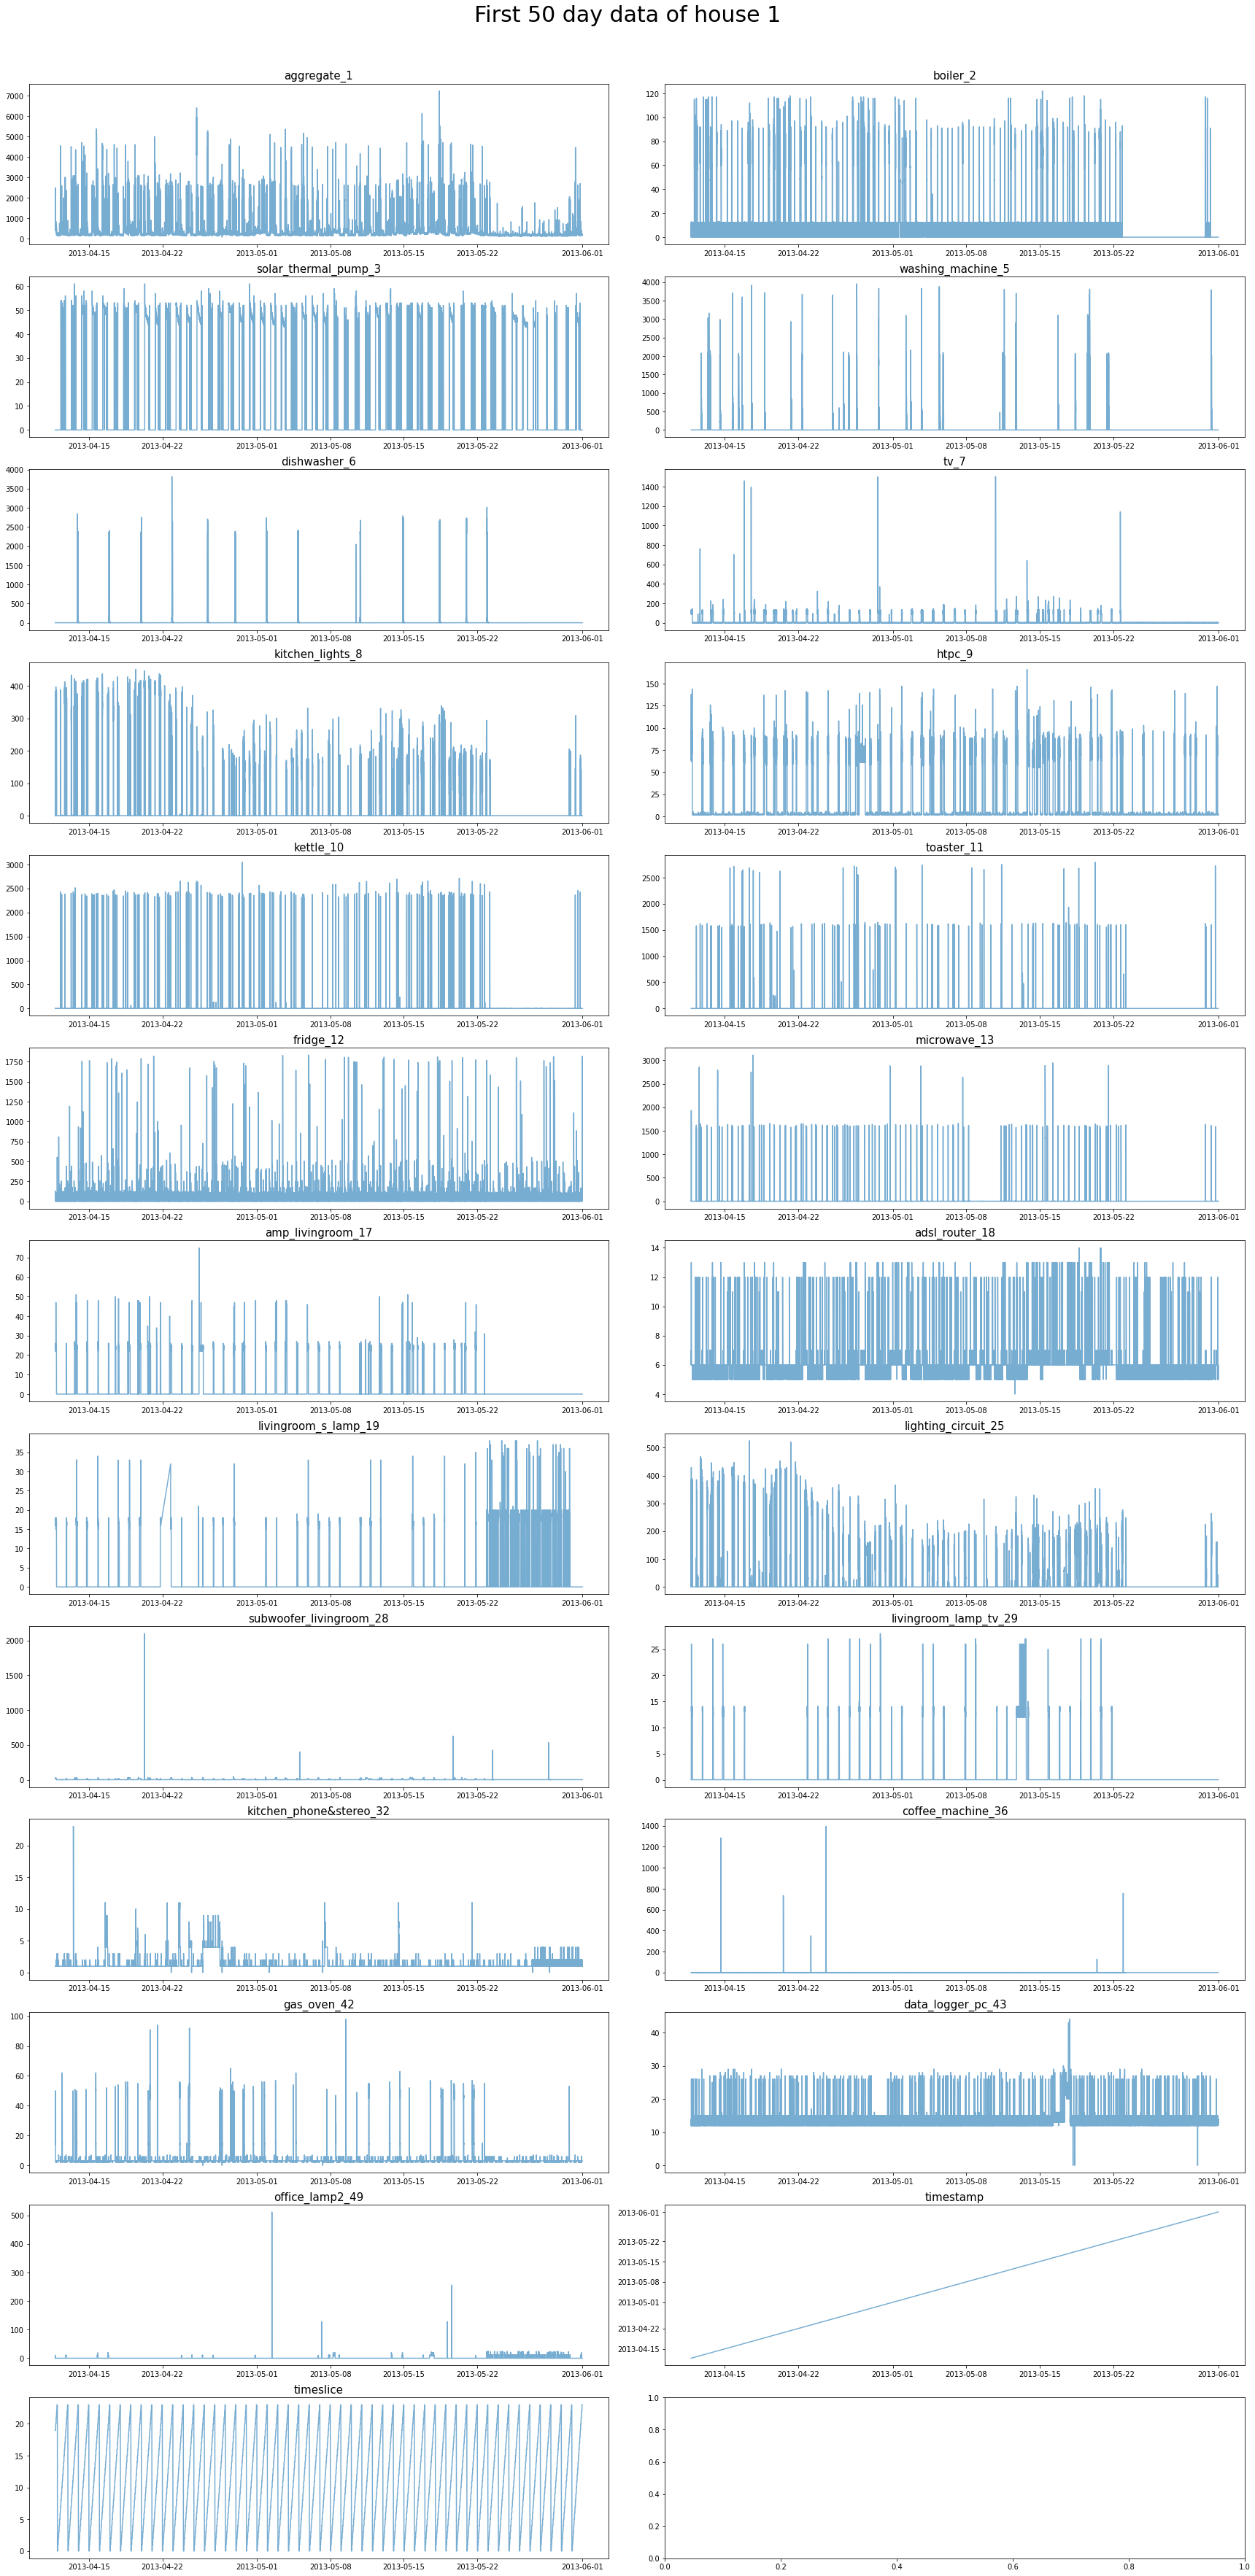

In [19]:
n_days = 50
plot_df(ref_chunk_df.loc[:dates[house][n_days]], f'First {n_days} day data of house 1')

In [20]:
# Separate house 1 data into train, validation and test data
df1_train = ref_chunk_df.loc[:dates[1][600]]
df1_val = ref_chunk_df.loc[dates[1][600]:dates[1][900]]
df1_test = ref_chunk_df.loc[dates[1][900]:]
print('df_train.shape: ', df1_train.shape)
print('df_val.shape: ', df1_val.shape)
print('df_test.shape: ', df1_test.shape)

df_train.shape:  (8313043, 25)
df_val.shape:  (4168894, 25)
df_test.shape:  (3545844, 25)


In [21]:
# Using aggregate_1 to predict tv_7
x_train = df1_train[['aggregate_1', 'timeslice']].values
y_train = df1_train.drop(['aggregate_1', 'timestamp', 'timeslice'], axis=1).values
x_val = df1_val[['aggregate_1', 'timeslice']].values
y_val = df1_val.drop(['aggregate_1', 'timestamp', 'timeslice'], axis=1).values
x_test = df1_test[['aggregate_1', 'timeslice']].values
y_test = df1_test.drop(['aggregate_1', 'timestamp', 'timeslice'], axis=1).values
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)
print(y_train.shape[1])

(8313043, 2) (8313043, 22) (4168894, 2) (4168894, 22) (3545844, 2) (3545844, 22)
22


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError


from timeit import default_timer as timer

class TimingCallback(Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

def compile_model(model):
    # output the model's structure
#     model.summary()

    # Model compilation
    optimizer = Adam(lr=0.01)
    # Consider regression metrics rather than accuracy : rmse, mae     
    model.compile(loss='mse', optimizer=optimizer,metrics=['accuracy', RootMeanSquaredError(), MeanAbsoluteError()])
    time_cb = TimingCallback()
    callbacks = [time_cb]

    # Model Training
    history = model.fit(x_train, y_train, epochs=1000, batch_size=1000, validation_data=(x_val, y_val), callbacks=callbacks)

    return history, sum(time_cb.logs)


model = Sequential()
# m.add(Flatten(input_shape=(943, 1)))
model.add(Dense(1000, activation='relu', input_dim = 2))
model.add(Dense(1000, activation='relu'))
model.add(Dense(y_train.shape[1],activation='linear'))

model.summary()

history, time_spent = compile_model(model)
# view_model_results(model, history)
print('Time spent', time_spent)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              3000      
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_2 (Dense)             (None, 22)                22022     
                                                                 
Total params: 1,026,022
Trainable params: 1,026,022
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
8314/8314 [==============================] - 54s 6ms/step - loss: 4251.0864 - accuracy: 0.4556 - root_mean_squared_error: 65.2004 - mean_absolute_error: 12.4015 - val_loss: 5151.8076 - val_accuracy: 0.4428 - val_root_mean_squared_error: 71.7760 - val_mean_absolute_error: 13.5195
Epoch 2/1000
8314

In [ ]:
def view_model_results(model, history):
    fig = plt.figure()
    fig.add_subplot(1,2,1)
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='test loss')
    plt.legend()
    plt.grid(True)
    plt.xlim([0,3])
    plt.ylim([0,1.0])
    plt.xlabel('epoch')

    fig.add_subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='test accuracy')
    plt.legend()
    plt.grid(True)
    plt.xlim([0,3])
    plt.ylim([0,1.0])
    plt.xlabel('epoch')


    print(history.history.keys())
    
view_model_results(model, history)